I have implemented Linear Regression on the dataset. I have also explained the steps that I have taken and why I did it. Any suggestions would be helpful as this is only my third notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Dataset


In [2]:
data = pd.read_csv("../input/vehicle-dataset-from-cardekho/car data.csv")

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Assessment


This tells that whether any feature column has a 'Null Value'

In [4]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

This gives the total rows and columns along with the total indexes

In [5]:
data.describe

<bound method NDFrame.describe of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1

# Visualization of Data

**I have used Relplot which is taken from Seaborn. This analyzes the data in the form of scatter points.**

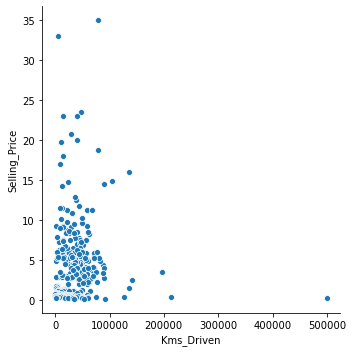

In [6]:
sns.relplot( y = 'Selling_Price', x = 'Kms_Driven',  data = data)

**The maximum car selling prices are between 2-10 lakhs for the cars owned by only 1 individual before. For the cars owned by 2 indiviudals, the price points are less and for the cars owned by 4 individuals is almost null. **

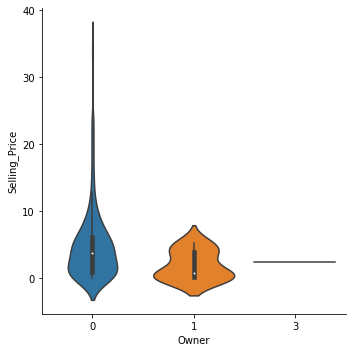

In [7]:
sns.catplot(x='Owner', y ='Selling_Price', kind = 'violin',data= data)

**The number of manual cars are sold the most.**

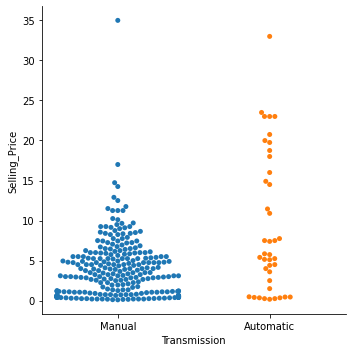

In [8]:
sns.catplot(x='Transmission', y ='Selling_Price', kind = 'swarm',data= data)

**The petrol cars are the highest number, followed by Diesel cars and then comes CNG cars fetching the lowest selling price point**

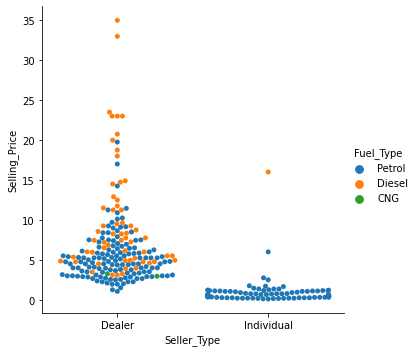

In [9]:
sns.catplot(x='Seller_Type', y ='Selling_Price', kind = 'swarm',data= data,hue = 'Fuel_Type')

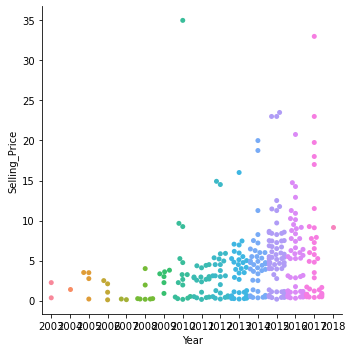

In [10]:
sns.catplot(x='Year', y ='Selling_Price', kind = 'swarm',data= data)

The dependence of numeric features on each other is determined by Correlation

In [11]:
correlation = data.corr()

This gives us a heatmap of the numeric features against each other. You can see from the plot that ->

1. 'Selling_Price' and 'Year' has 0.24 correlation factor which means that as the cars that are recently bought fetches more selling price.
2. 'Selling_Price' and 'Present_Price' has 0.88 correlation factor which is the highest among all factors and this is close to +1 which means that as the Present_Price increases, the 'Selling_Price' increases at almost the same sharp rate.
3.  'Selling_Price' and 'kms_driven' have 0.029 correlation factor which is almost equal to 0 which shows the relationship between them can be dropped.
4.  'Selling_Price' and 'Owner' have -.088 which is also almost equal to 0 which means there isn't much of a relationship between them.

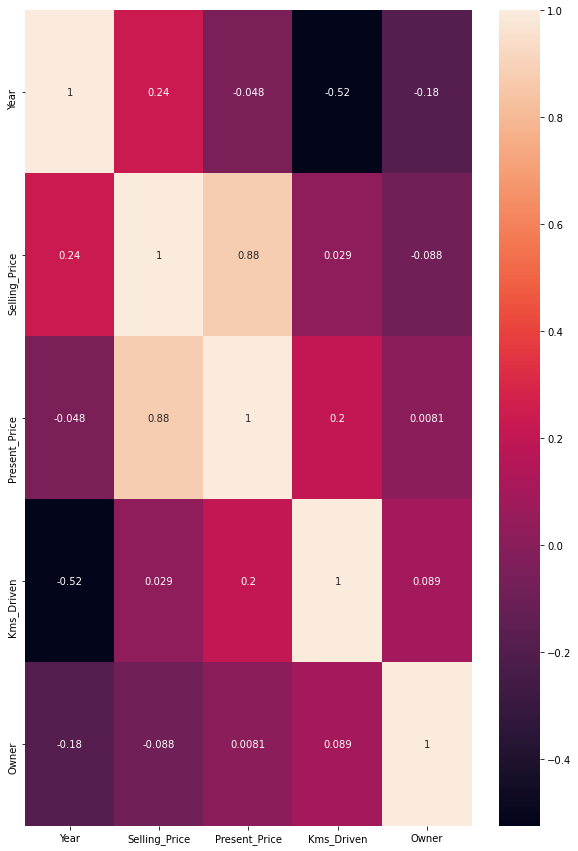

In [12]:
plt.subplots(figsize=(10,15))
sns.heatmap(correlation, annot = True)

This shows a bar plot as well as scatter plot for both the values. The bar plot tells the maximum 'Selling_Price' is at what points and similarly for 'Present_Price'

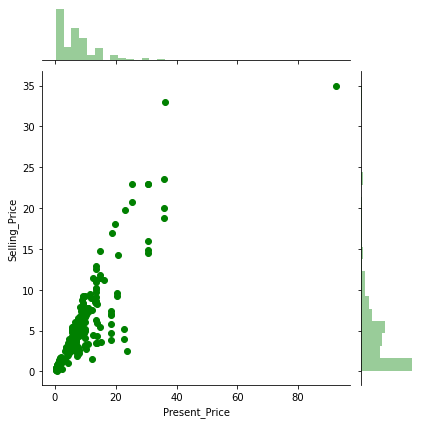

In [13]:
sns.jointplot(x = 'Present_Price', y ='Selling_Price', data=data, color = 'Green')

Graphically represents the numeric factors of all features amongst each other.

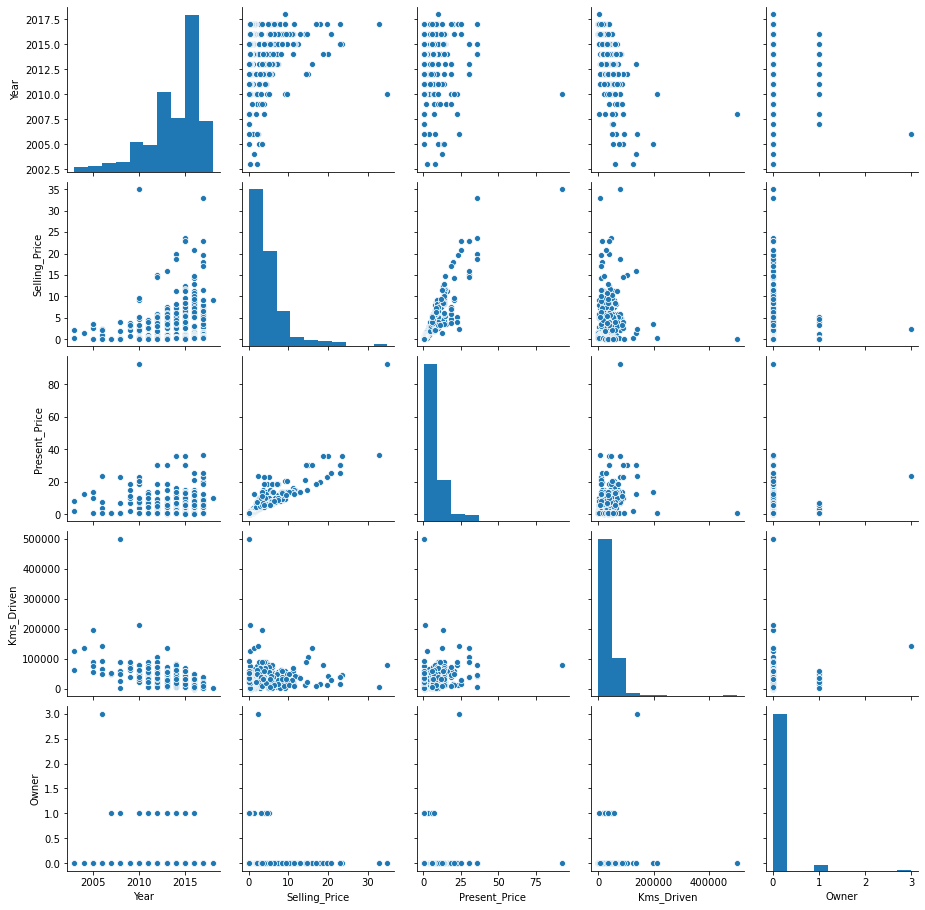

In [14]:
sns.pairplot(data = data)

# Creating Dummy Features

**The string values have to be changed to Numeric values to be included in the algorithm as string values cannot be regarded. This is achieved by creating dummy values for the features having String values.**

In [15]:
dummy1 = pd.get_dummies(data.Fuel_Type)
dummy2 = pd.get_dummies(data.Seller_Type)
dummy3 = pd.get_dummies(data.Transmission)

The new features are merged onto the original dataset

In [16]:
merge = pd.concat([data,dummy1,dummy2,dummy3], axis = 'columns')

I have dropped the Fuel_type, Seller_Type and Transmission columns from the dataset. This is because I have created dummy variables for them.
Moreover, I have also dropped one each type of value for the newly created dummy variables. This is because the value becomes redundant. This can be explained as, if the Diesel value is 0 and the petrol value is also 0, this automatically means that the feature for CNG is 1 for that row. Similarly,this is true for rest of the dummy features. 

In [17]:
final = merge.drop(['Car_Name','Fuel_Type','Seller_Type','Transmission','CNG','Individual','Automatic','Owner','Kms_Driven'], axis = 'columns')

In [18]:
final


,Year,Selling_Price,Present_Price,Diesel,Petrol,Dealer,Manual
0,2014,3.35,5.59,0,1,1,1
1,2013,4.75,9.54,1,0,1,1
2,2017,7.25,9.85,0,1,1,1
3,2011,2.85,4.15,0,1,1,1
4,2014,4.60,6.87,1,0,1,1
...,...,...,...,...,...,...,...
296,2016,9.50,11.60,1,0,1,1
297,2015,4.00,5.90,0,1,1,1
298,2009,3.35,11.00,0,1,1,1
299,2017,11.50,12.50,1,0,1,1


# Linear Regression


X denotes all the features except "Selling_Price"

In [19]:
X = final.drop(['Selling_Price'],axis = 'columns')

y denotes the 'Selling_Price'

In [20]:
y = final['Selling_Price']

The test size and train size is 20 to 80

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state = 20)

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [23]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
model.score(X_test,y_test)

0.9202235710743033

**The accuracy is 0.92 for my model. If I change the random_state, the accuracy also changes. This is applicable for all models.**